Name : Pradyumna PS
Email ID : pradyumnaps193@gmail.com   

In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [27]:
data = pd.read_csv("50_Startups.csv")

In [28]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


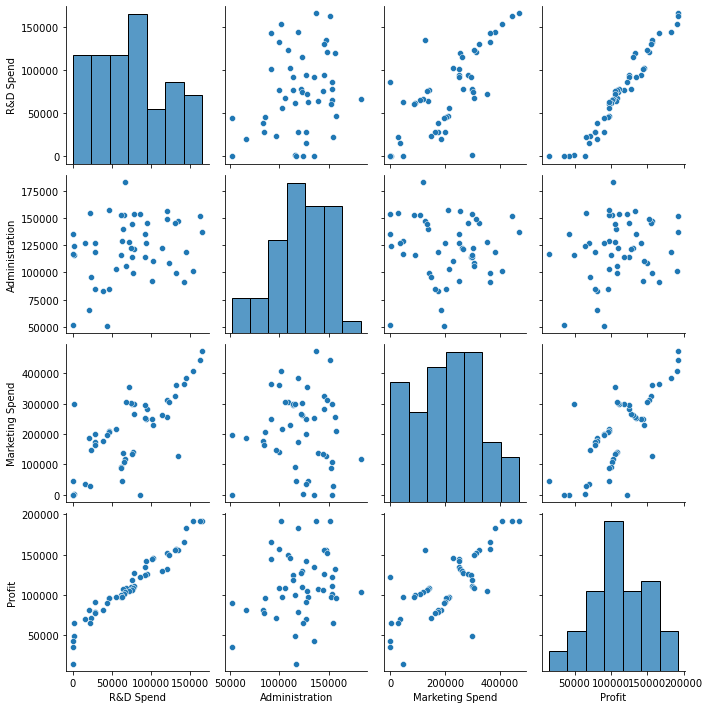

In [29]:
sns.pairplot(data)

In [30]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [31]:
 #dropping the state column as it has no effect on the profit parameter
data_c1 = data.drop(["State"],axis = 1)
data_c1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [32]:
data_c1.rename({"R&D Spend": "rnd_spend"}, axis=1, inplace=True)
data_c1.rename({"Marketing Spend": "market_spend"}, axis=1, inplace=True)
data_c1.head()

,rnd_spend,Administration,market_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [33]:
model = smf.ols("Profit~rnd_spend+Administration+market_spend", data=data_c1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        16:28:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd_spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model1 = smf.ols("Profit~rnd_spend+market_spend", data=data_c1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        16:28:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rnd_spend        0.7966      0.041     19.266      0.000       0.713       0.880
market_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import statsmodels.formula.api as smf 
model1 = smf.ols('Profit~rnd_spend+Administration+market_spend',data=data_c1).fit()
f'AIC:{model1.aic}, rsq_model1:{model1.rsquared}'

'AIC:1058.7714985998055, rsq_model1:0.9507459940683246'

In [35]:
rsq_admin_spend = smf.ols("Administration~rnd_spend+market_spend",data=data_c1).fit().rsquared
vif_admin=(1/(1-rsq_admin_spend))
print(f'vif of admin_spend : {vif_admin}')

rsq_market = smf.ols("market_spend~Administration+rnd_spend",data=data_c1).fit().rsquared
vif_market=(1/(1-rsq_market))
print(f'vif of market_spend : {vif_market}')

rsq_rnd = smf.ols("rnd_spend~market_spend+Administration",data=data_c1).fit().rsquared
vif_rnd=(1/(1-rsq_market))
print(f'vif of rnd_spend : {vif_rnd}')

vif of admin_spend : 1.1750910070550455
vif of market_spend : 2.3267732905308773
vif of rnd_spend : 2.3267732905308773


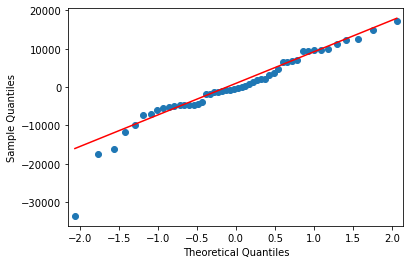

In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm 
sm.qqplot(model1.resid, line="q")
plt.show()

In [37]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

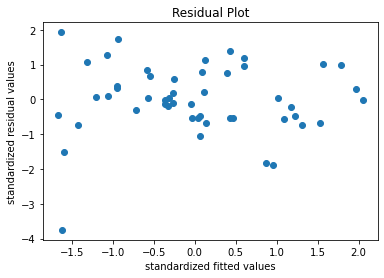

In [38]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


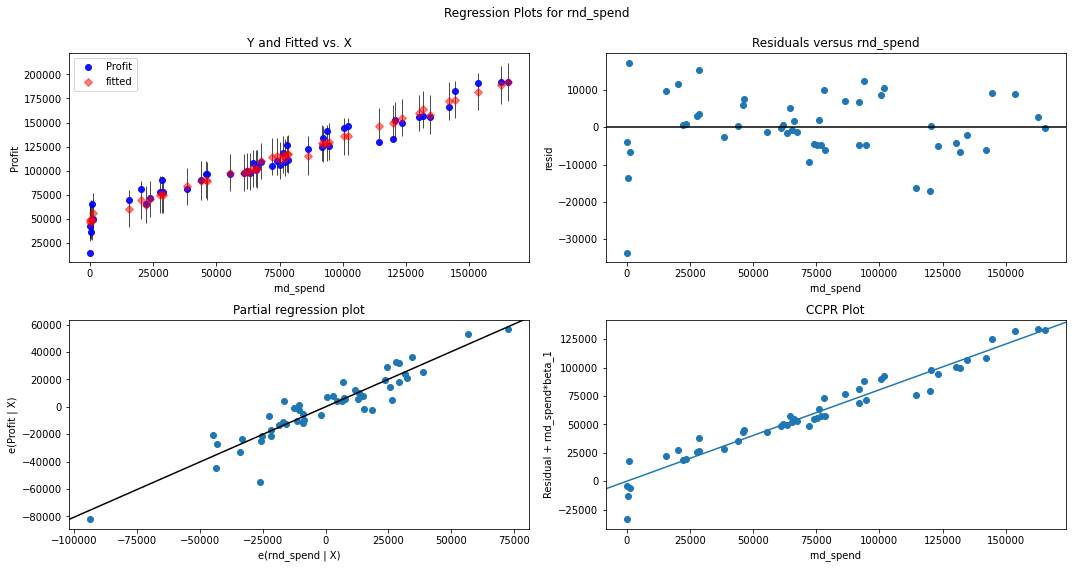

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'rnd_spend',fig=fig)
plt.show()

eval_env: 1


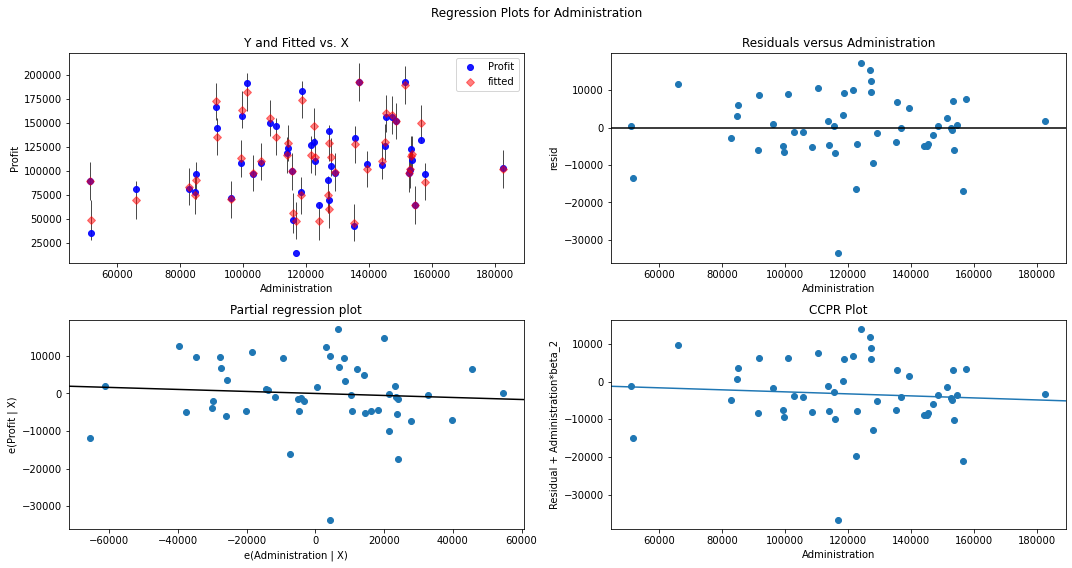

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Administration',fig=fig)
plt.show()

eval_env: 1


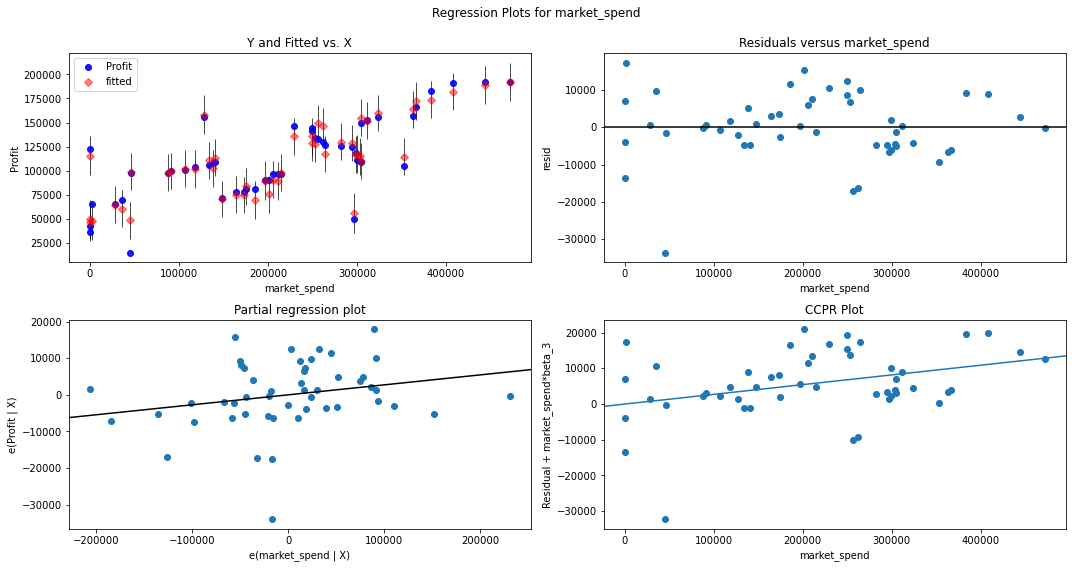

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'market_spend',fig=fig)
plt.show()


In [40]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

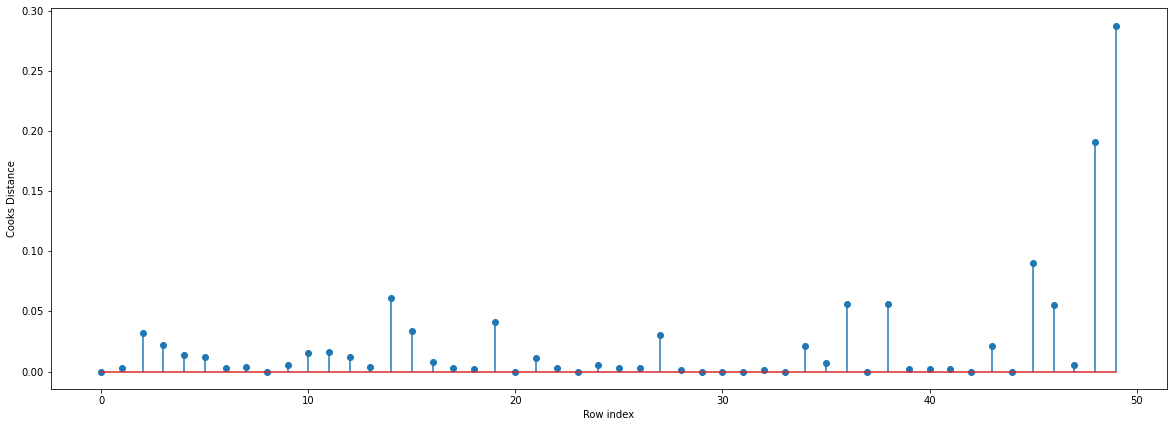

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

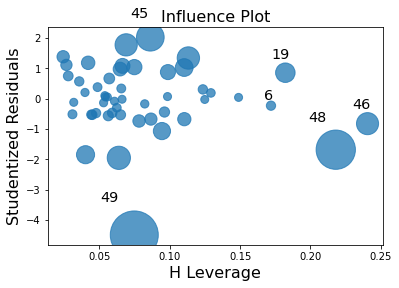

In [16]:
sm.graphics.influence_plot(model1)
plt.show()

In [20]:
k=data_c1.shape[1]
n=data_c1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [22]:
data_c1[data_c1.index.isin([49])] 

,rnd_spend,Administration,market_spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [56]:
data2=data_c1.drop(data_c1.index[[49]],axis=0).reset_index(drop=True)
data2

,rnd_spend,Administration,market_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [58]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~rnd_spend+Administration+market_spend",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~rnd_spend+Administration+market_spend",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129848


In [48]:
new_data=pd.DataFrame({"rnd_spend":70000,"Administration":90000,"market_spend":140000},index=[0])
new_data

,rnd_spend,Administration,market_spend
0,70000,90000,140000


In [59]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [61]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [62]:
d2={'Prep_Models':['Model','Model1'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model1,0.961316
